<a href="https://colab.research.google.com/github/phillipsophie/project_gss/blob/main/ds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [162]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [163]:
list(df.columns)

['year',
 'id',
 'wrkstat',
 'hrs1',
 'hrs2',
 'evwork',
 'occ',
 'prestige',
 'wrkslf',
 'wrkgovt',
 'commute',
 'industry',
 'occ80',
 'prestg80',
 'indus80',
 'indus07',
 'occonet',
 'found',
 'occ10',
 'occindv',
 'occstatus',
 'occtag',
 'prestg10',
 'prestg105plus',
 'indus10',
 'indstatus',
 'indtag',
 'marital',
 'martype',
 'agewed',
 'divorce',
 'widowed',
 'spwrksta',
 'sphrs1',
 'sphrs2',
 'spevwork',
 'cowrksta',
 'cowrkslf',
 'coevwork',
 'cohrs1',
 'cohrs2',
 'spocc',
 'sppres',
 'spwrkslf',
 'spind',
 'spocc80',
 'sppres80',
 'spind80',
 'spocc10',
 'spoccindv',
 'spoccstatus',
 'spocctag',
 'sppres10',
 'sppres105plus',
 'spind10',
 'spindstatus',
 'spindtag',
 'coocc10',
 'coind10',
 'paocc16',
 'papres16',
 'pawrkslf',
 'paind16',
 'paocc80',
 'papres80',
 'paind80',
 'paocc10',
 'paoccindv',
 'paoccstatus',
 'paocctag',
 'papres10',
 'papres105plus',
 'paind10',
 'paindstatus',
 'paindtag',
 'maocc80',
 'mapres80',
 'mawrkslf',
 'maind80',
 'maocc10',
 'maoccindv',


In [164]:
demographic_vars = ['sex', 'age', 'educ', 'degree', 'relig']
print(df.loc[:, demographic_vars].head())

      sex   age  educ       degree       relig
0    male  48.0  12.0  high school   christian
1    male  25.0  16.0   bachelor's        none
2    male  42.0  16.0   bachelor's    catholic
3    male  24.0  14.0  high school  protestant
4  female  24.0  16.0   bachelor's    catholic


In [165]:
print(df['relig'].unique())

['christian', 'none', 'catholic', 'protestant', 'buddhism', ..., NaN, 'orthodox-christian', 'inter-nondenominational', 'native american', 'other eastern religions']
Length: 14
Categories (26, object): ['protestant', 'catholic', 'jewish', 'none', ..., 'uncodeable',
                          'not available in this release', 'not available in this year', 'see codebook']


# Basic bar graphs for each question related to gender roles

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# keep in this order
df_basic_bar_graphs = df.copy()

fechld = df_basic_bar_graphs['fechld']
fepresch2 = df_basic_bar_graphs['fepresch2']
rspgndr = df_basic_bar_graphs['rspgndr']
prntlk = df_basic_bar_graphs['prntlk']
prntfnce = df_basic_bar_graphs['prntfnce']
prntcre = df_basic_bar_graphs['prntcre']
prntply = df_basic_bar_graphs['prntply']
prntbhav = df_basic_bar_graphs['prntbhav']
prntadvs = df_basic_bar_graphs['prntadvs']
prntmdl = df_basic_bar_graphs['prntmdl']
orginc = df_basic_bar_graphs['orginc']
sharehhw = df_basic_bar_graphs['sharehhw']
cabgndr = df_basic_bar_graphs['cabgndr']
univgndr = df_basic_bar_graphs['univgndr']
execgndr = df_basic_bar_graphs['execgndr']
rfamlook = df_basic_bar_graphs['rfamlook'] # this one is numeric and needs 12 bins

df_list = [fechld, fepresch2, rspgndr, prntlk, prntfnce, prntcre, prntply, prntbhav, prntadvs, prntmdl, sharehhw, cabgndr, univgndr, execgndr, orginc, rfamlook]
df_names = ['fechld', 'fepresch2', 'rspgndr', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr', 'orginc', 'rfamlook']

In [168]:
fechld_responses = ['strongly agree','agree', 'disagree','strongly disagree']
fepresch2_responses = ['strongly agree','agree', 'neither agree nor disagree','disagree','strongly disagree']
rspgndr_responses = ['women take much more responsibility', 'women take somewhat more responsibility', 'women and men take equal responsibility', 'men take somewhat more responsibility', 'men take much more responsibility']
prntlk_responses = ['mothers are much better suited','mothers are somewhat better suited','mothers and fathers are equally suited','fathers are somewhat better suited','fathers are much better suited']
prntfnce_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntcre_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntply_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntbhav_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntadvs_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntmdl_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
orginc_responses = ['r manage all money and gives spouse/partner his/her share',
                                      'r spouse/partner manages all money and gives r share',
                                      'r and spouse/partner pool all money and take what we need',
                                      'r and spouse/partner pool some money and keep rest separate',
                                      'r and spouse/partner keep money separate']
sharehhw_responses = ['r does much more than fair share',
                                      'r does a bit more than fair share',
                                      'r does roughly fair share',
                                      'r does a bit less than fair share',
                                      'r does much less than fair share']
cabgndr_responses = ['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']
univgndr_responses = ['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']
execgndr_responses = ['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']

responses_list = [fechld_responses, fepresch2_responses, rspgndr_responses, prntlk_responses, prntfnce_responses, prntcre_responses, prntply_responses, prntbhav_responses, prntadvs_responses, prntmdl_responses, sharehhw_responses, cabgndr_responses, univgndr_responses, execgndr_responses, orginc_responses]

            response  count
0     strongly agree   4850
1              agree   6805
2           disagree   3061
3  strongly disagree    680
                     response  count
0              strongly agree     44
1                       agree    188
2  neither agree nor disagree    167
3                    disagree    429
4           strongly disagree    300
                                  response  count
0      women take much more responsibility     18
1  women take somewhat more responsibility     35
2  women and men take equal responsibility    912
3    men take somewhat more responsibility     78
4        men take much more responsibility     39
                                 response  count
0          mothers are much better suited     98
1      mothers are somewhat better suited    178
2  mothers and fathers are equally suited    794
3      fathers are somewhat better suited      6
4          fathers are much better suited      5
                                   response 

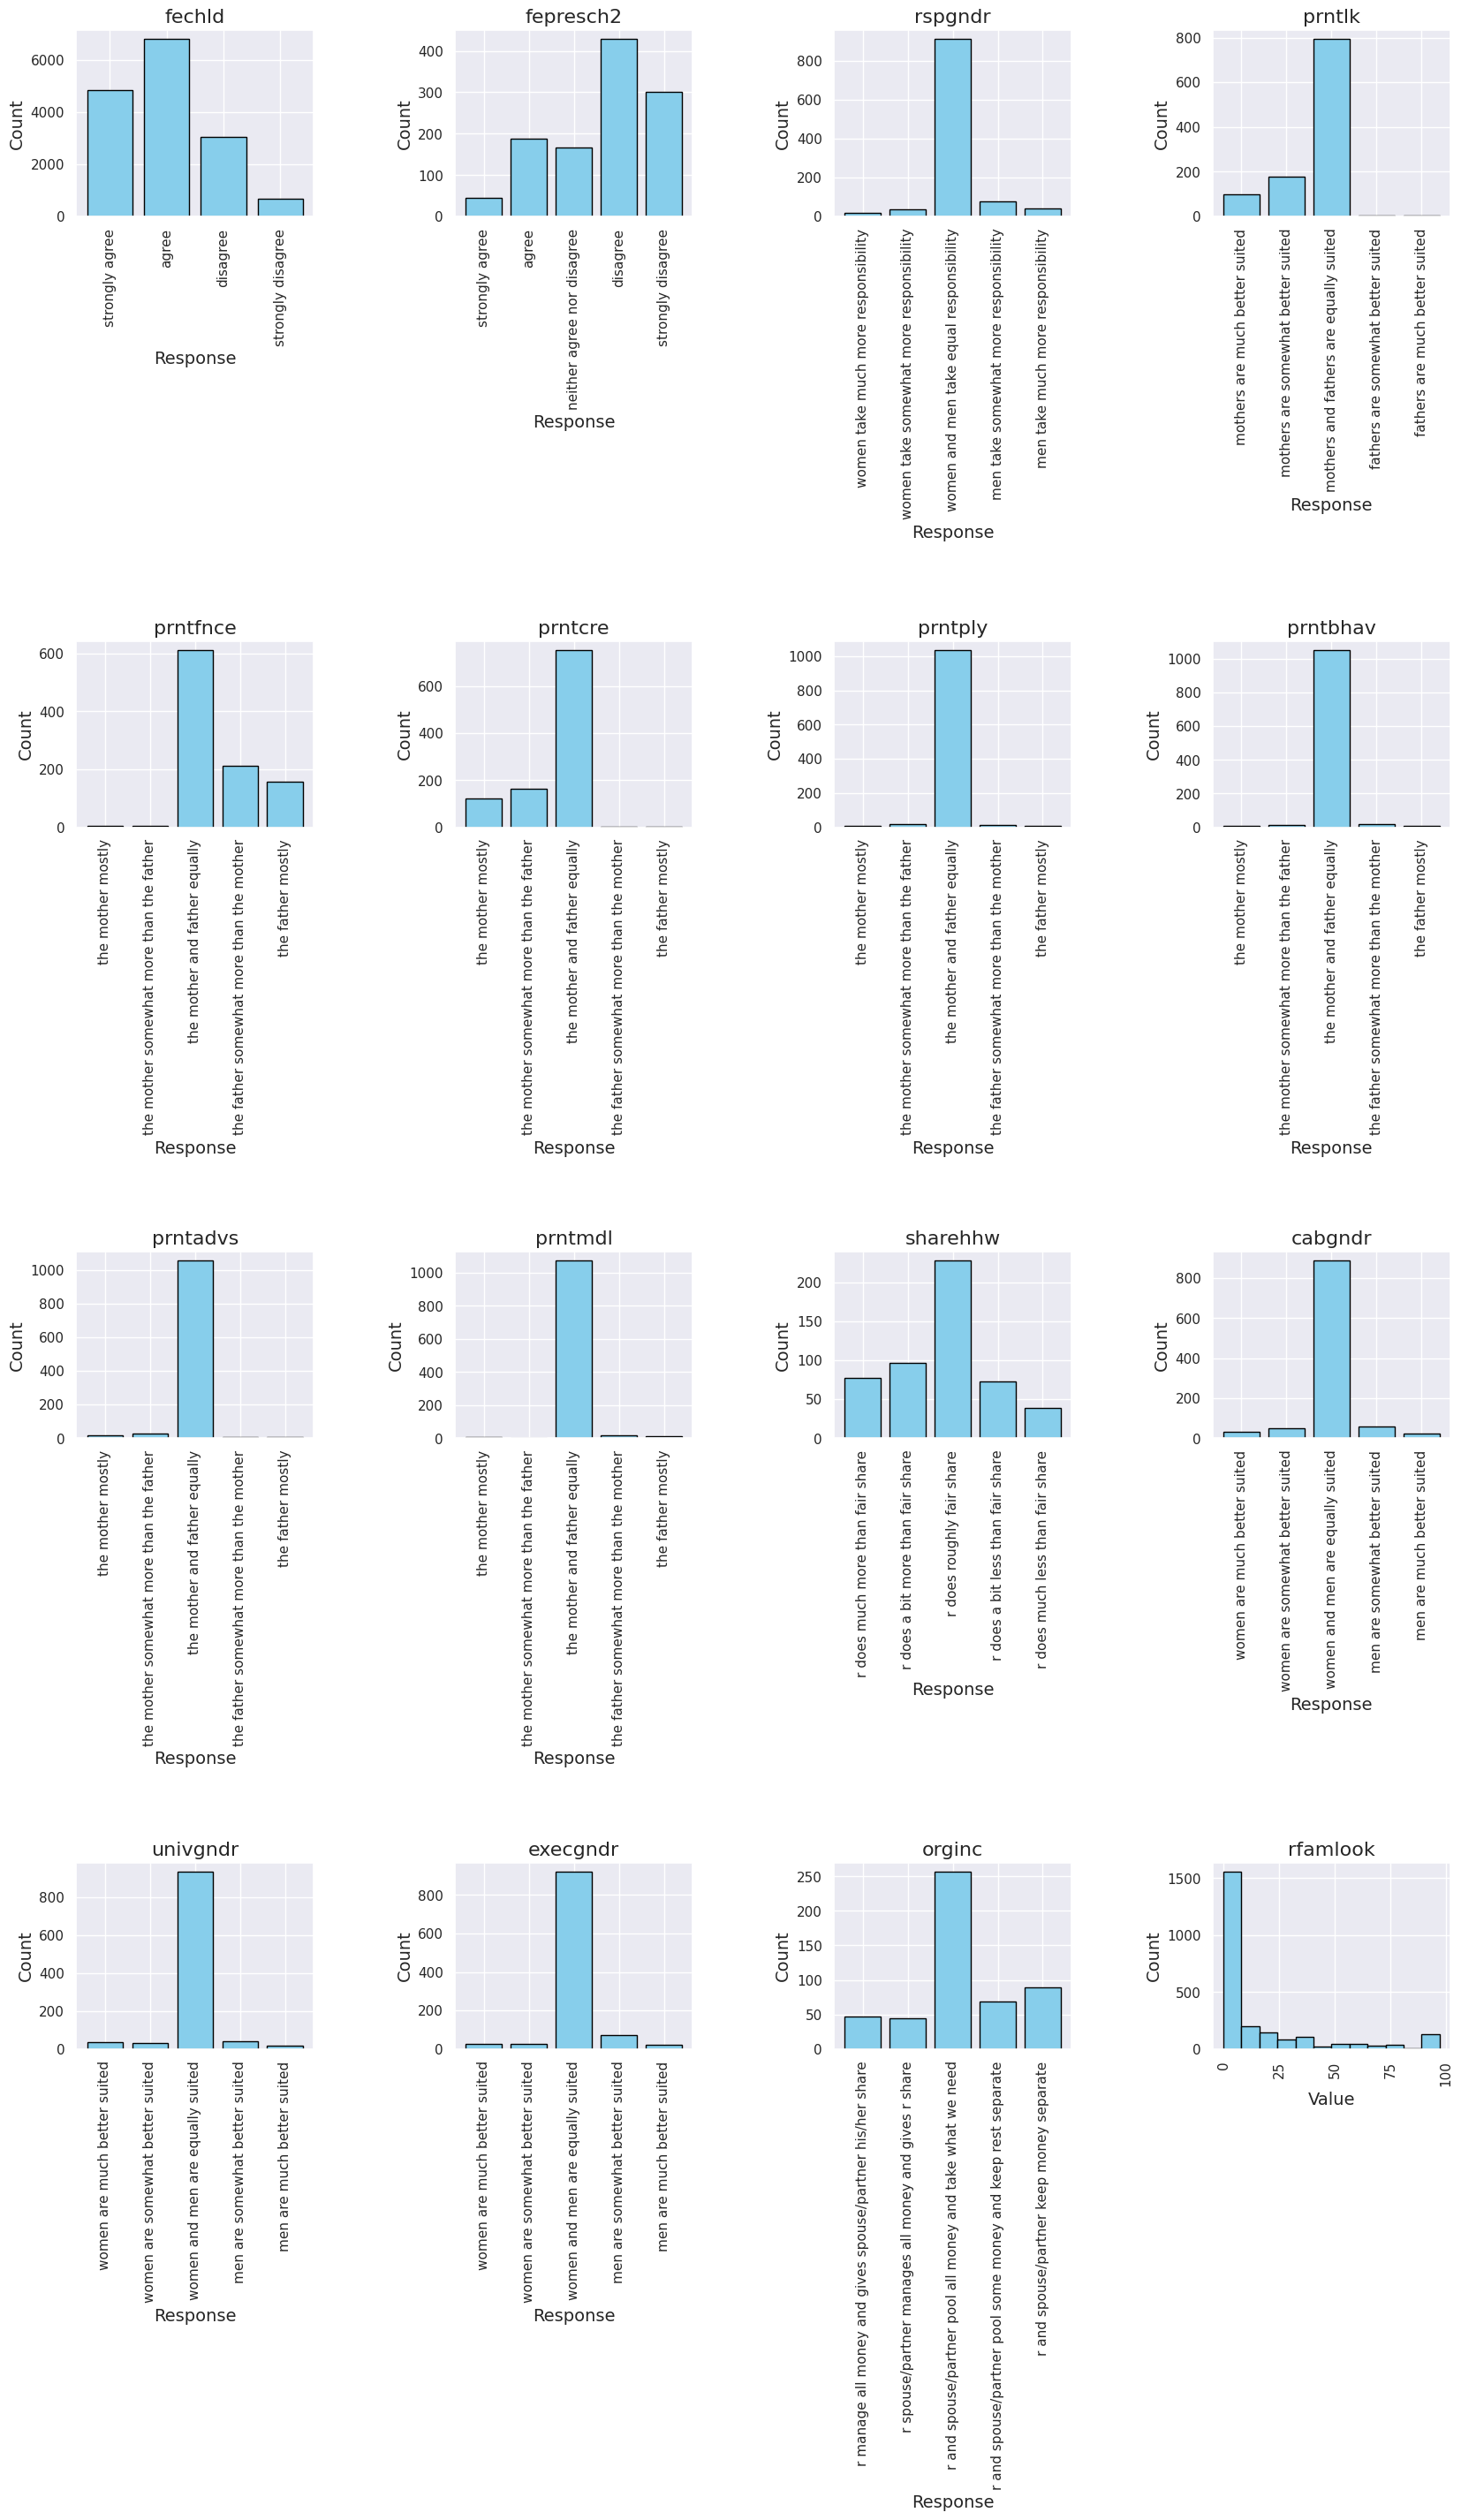

In [169]:
fig, axs = plt.subplots(4, 4, figsize=(18, 30))
for i, ax in enumerate(axs.flatten()):
    if i == (len(df_list) - 1): # skip last dataframe that needs to be handled differently because values are numeric
        continue

    name = df_names[i]
    curr_response = responses_list[i]
    curr_df = df_list[i].value_counts()[curr_response]
    curr_df = curr_df.reset_index()
    curr_df.columns = ['response', 'count']
    print(curr_df)
    curr_df = curr_df.loc[curr_df['count'] != 0]

    ax.bar(x = curr_df['response'], height=curr_df['count'], color='skyblue', edgecolor='black')
    ax.set_title(f'{name}', fontsize=16)
    ax.set_xlabel('Response', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', labelrotation=90)

name = df_names[len(df_list) - 1]
curr_df = rfamlook
curr_df = curr_df.reset_index().rename(columns={0: "value"})
print(curr_df)

axs[3,3].hist(x = curr_df['rfamlook'], bins=12, color='skyblue', edgecolor='black')
axs[3,3].set_title(f'{name}', fontsize=16)
axs[3,3].set_xlabel('Value', fontsize=14)
axs[3,3].set_ylabel('Count', fontsize=14)
axs[3,3].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
fig.subplots_adjust(hspace=1.4)
fig.tight_layout(pad=5.0)
plt.show()

# Bar Graphs Grouped by Religion for Gender Role Questions

In [170]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

# grouping the major religion types together because there is some weird overlap and it would clutter up any graphs
df_grouped_bar_graph = df.copy()
relig = df_grouped_bar_graph['relig'].astype(str)
relig = relig.replace(['other eastern religions', 'other'], 'other')
relig = relig.replace(['protestant', 'catholic', 'other eastern religions', 'orthodox-christian', 'christian'], 'christian')
relig = relig.replace(['muslim/islam'], 'muslim')
relig = relig.replace(['none'], 'atheist')
df_grouped_bar_graph['relig'] = relig

In [171]:
def normalize_each_religion(df, religions):
    # copy the dataframe
    df_norm = df.copy()
    count = df_norm['count'].astype(float)
    df_norm['count'] = count
    for religion in religions:
        religion_sum = df_norm['count'].loc[df_norm['relig'] == religion].sum()
        df_norm['count'].loc[df_norm['relig'] == religion] = ((df_norm['count'].loc[df_norm['relig'] == religion])/religion_sum) * 100
    return df_norm

Text(0.5, 1.0, 'fechld')

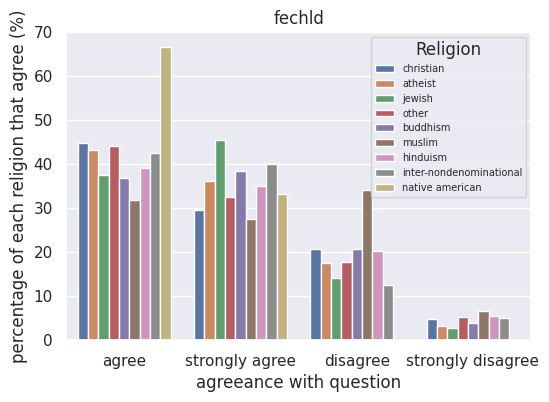

In [172]:
fechld_religion = df_grouped_bar_graph.loc[:, ['relig', 'fechld']]
fechld = fechld_religion['fechld'].astype(str)
fechld_religion['fechld'] = fechld
fechld_religion = fechld_religion.dropna() # dropping all rows with NaN values because they can't be graphed
fechld_religion = fechld_religion.loc[fechld_religion['fechld'].isin(['strongly agree','agree', 'disagree','strongly disagree'])].value_counts()
fechld_religion = fechld_religion.reset_index().rename(columns={"index": "fechld", 0: "count"})
fechld_religion = fechld_religion.loc[fechld_religion['relig'] != 'nan']

religions = fechld_religion['relig'].unique()
fechld_religion = normalize_each_religion(fechld_religion, religions)
sns.barplot(data=fechld_religion, x='fechld', y='count', hue='relig')
sns.set(rc={'figure.figsize':(6,4)})
plt.legend(loc='upper right', title='Religion', prop={'size': 7})
plt.xlabel("agreeance with question")
plt.ylabel("percentage of each religion that agree (%)")
plt.title('fechld')


#fechld = df_grouped_bar_graph['fechld'].value_counts()[['strongly agree','agree', 'disagree','strongly disagree']] # value counts returns type series
#fechld[fechld != 0].plot(kind='bar') # removes counts equal to 0



# print(fechld_by_age['relig'].unique())
#counts_with_category = counts_with_category.reset_index().rename(columns={"index": "state", 0: "count"})
# counts = counts.loc[:, ['State', 'Category']]
#sns.barplot(data=counts_with_category, x='State', y='count', hue='Category')

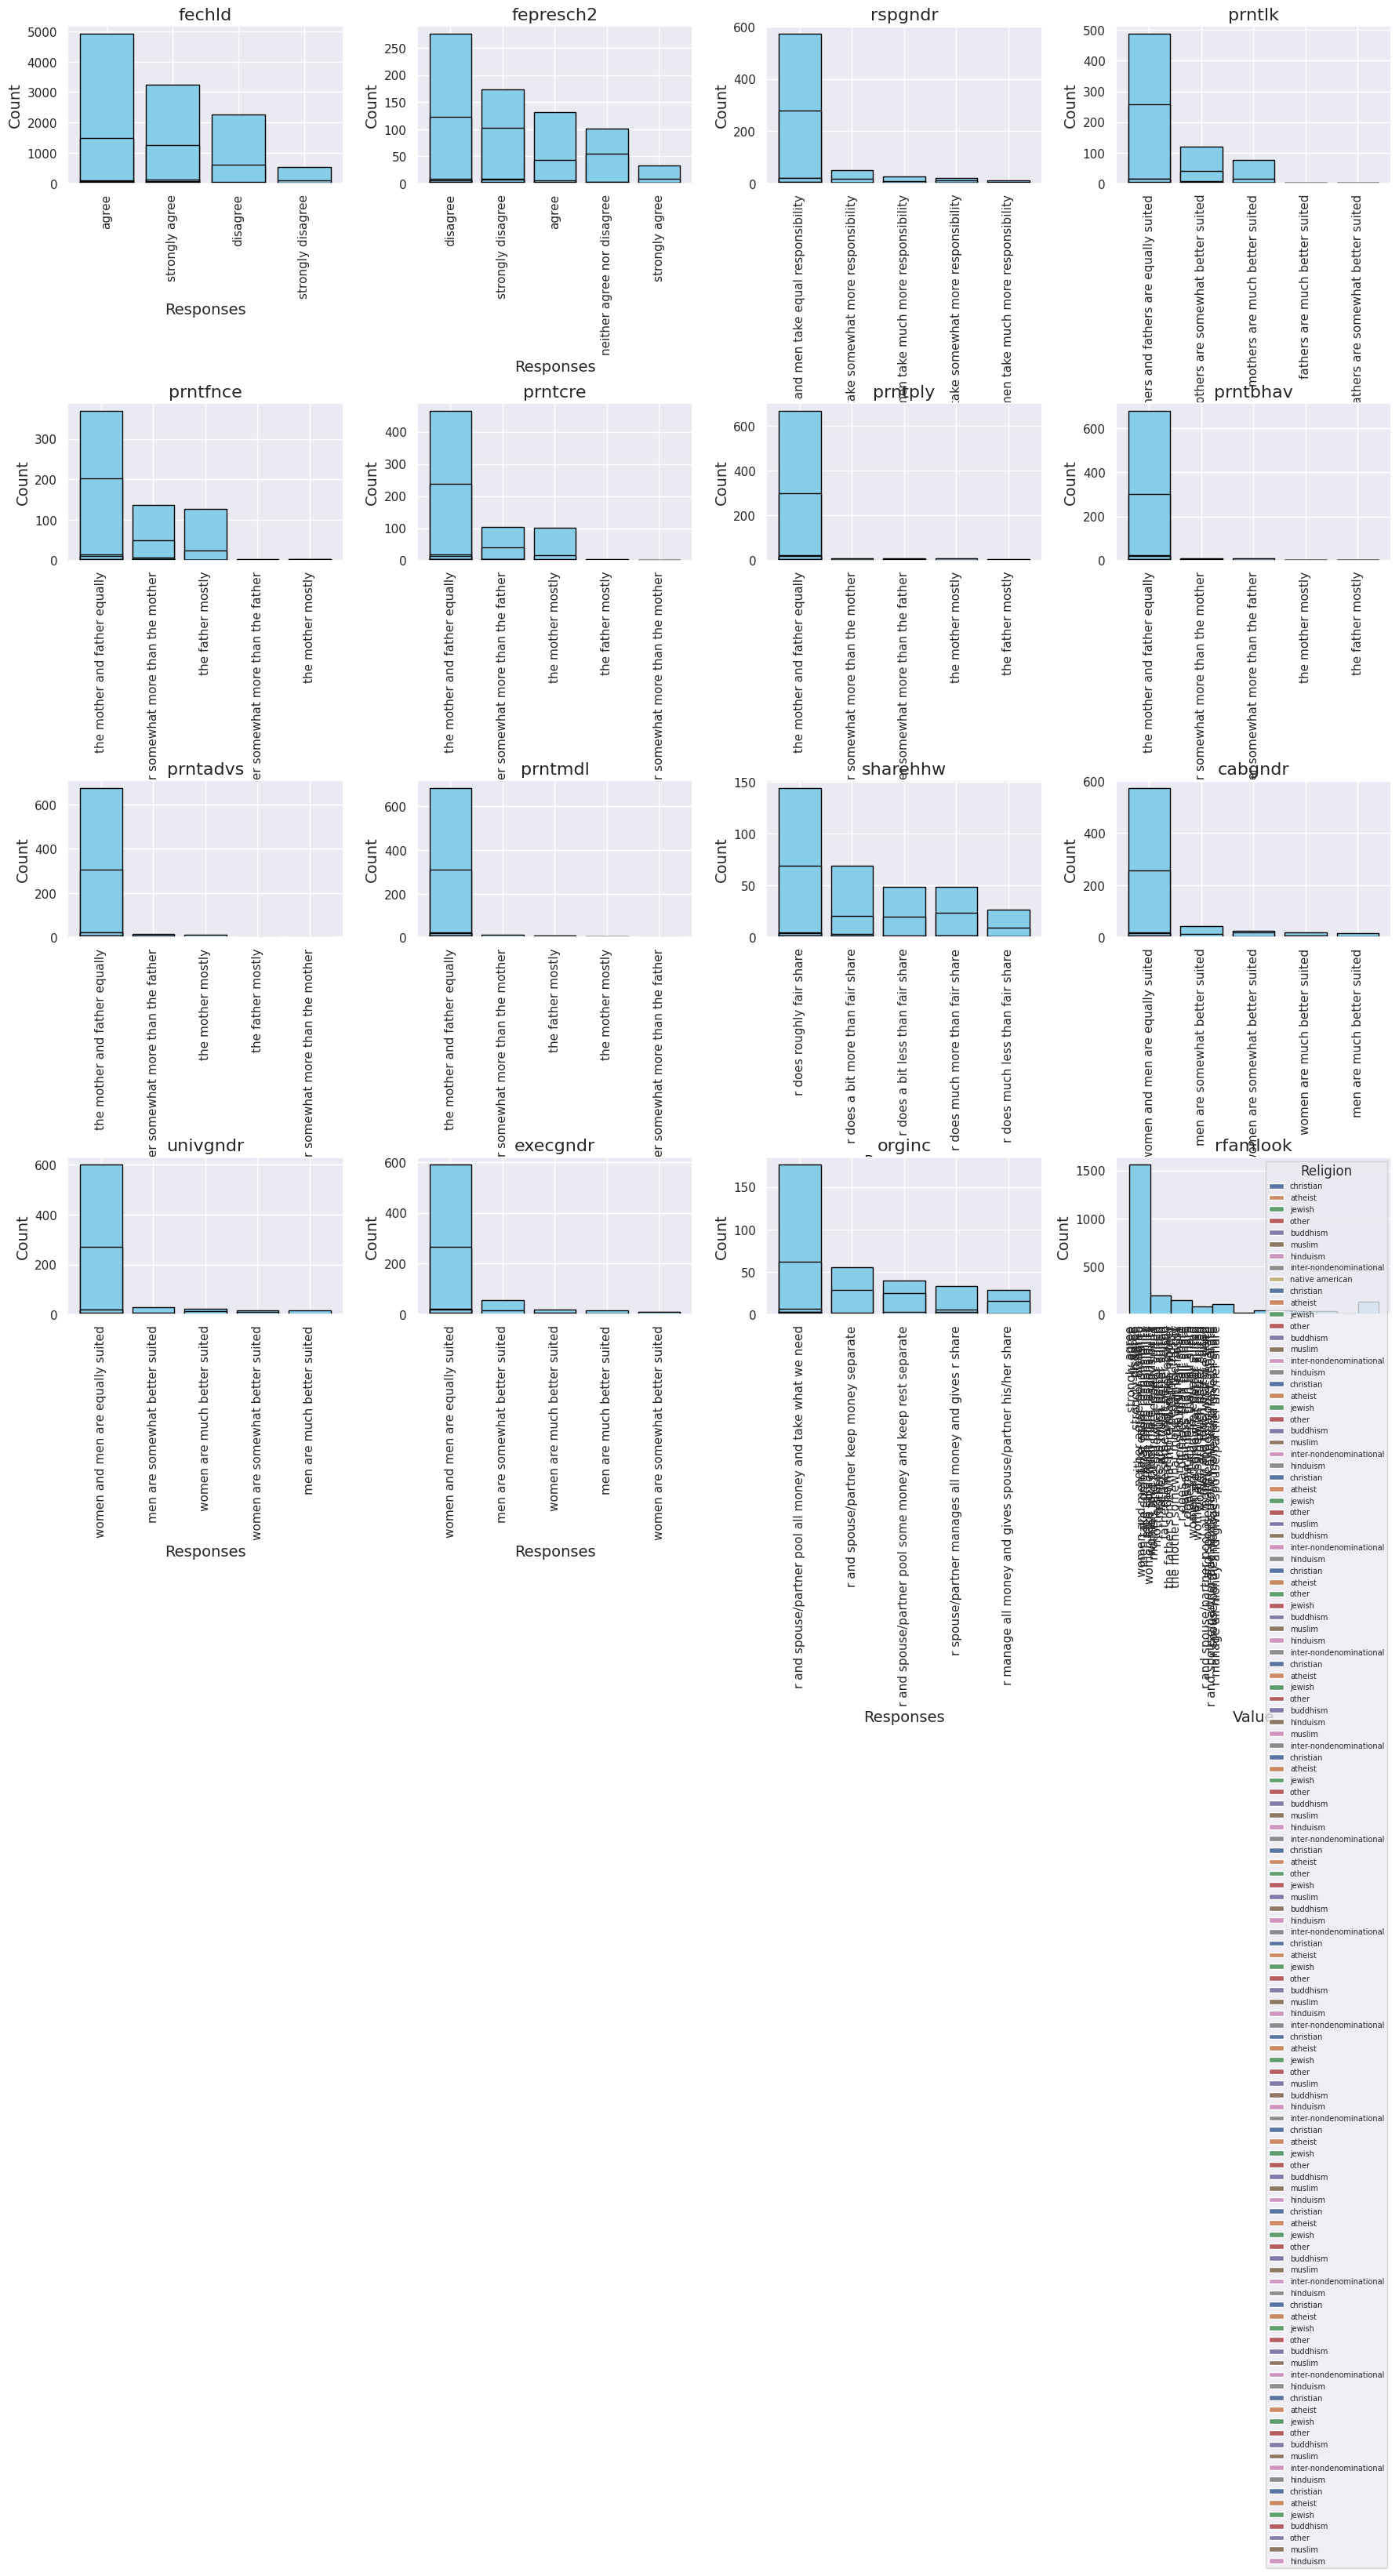

In [173]:
fig, axs = plt.subplots(4, 4, figsize=(18, 30))
for i, ax in enumerate(axs.flatten()):
    if i ==(len(df_list) - 1): # skip last dataframe that needs to be handled differently because values are numeric
        continue

    name = df_names[i]
    curr_response = responses_list[i]
    curr_df = df_grouped_bar_graph.loc[:, ['relig', name]]
    temp = curr_df[name].astype(str)
    curr_df[name] = temp
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed
    curr_df = curr_df.loc[curr_df[name].isin(curr_response)].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": name, 0: "count"})
    curr_df = curr_df.loc[curr_df['relig'] != 'nan']

    religions = curr_df['relig'].unique()
    fechld_religion = normalize_each_religion(curr_df, religions)
    sns.barplot(data = fechld_religion, x= fechld_religion.columns[1], y='count', hue='relig')
    sns.set(rc={'figure.figsize':(6,4)})
    plt.legend(loc='upper right', title='Religion', prop={'size': 7})
    plt.xlabel("agreeance with question")
    plt.ylabel("percentage of each religion that agree (%)")
    plt.title('fechld')

    ax.bar(curr_df[name], height=curr_df['count'], color='skyblue', edgecolor='black')
    ax.set_title(f'{name}', fontsize=16)
    ax.set_xlabel('Responses', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', labelrotation=90)

name = df_names[len(df_list) - 1]
curr_df = rfamlook
# curr_df = curr_df.reset_index().rename(columns={0: "value"})

axs[3,3].hist(curr_df, bins=12, color='skyblue', edgecolor='black')
axs[3,3].set_title(f'{name}', fontsize=16)
axs[3,3].set_xlabel('Value', fontsize=14)
axs[3,3].set_ylabel('Count', fontsize=14)
axs[3,3].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
fig.subplots_adjust(hspace=1.4)
# fig.tight_layout(pad=5.0)
plt.show()

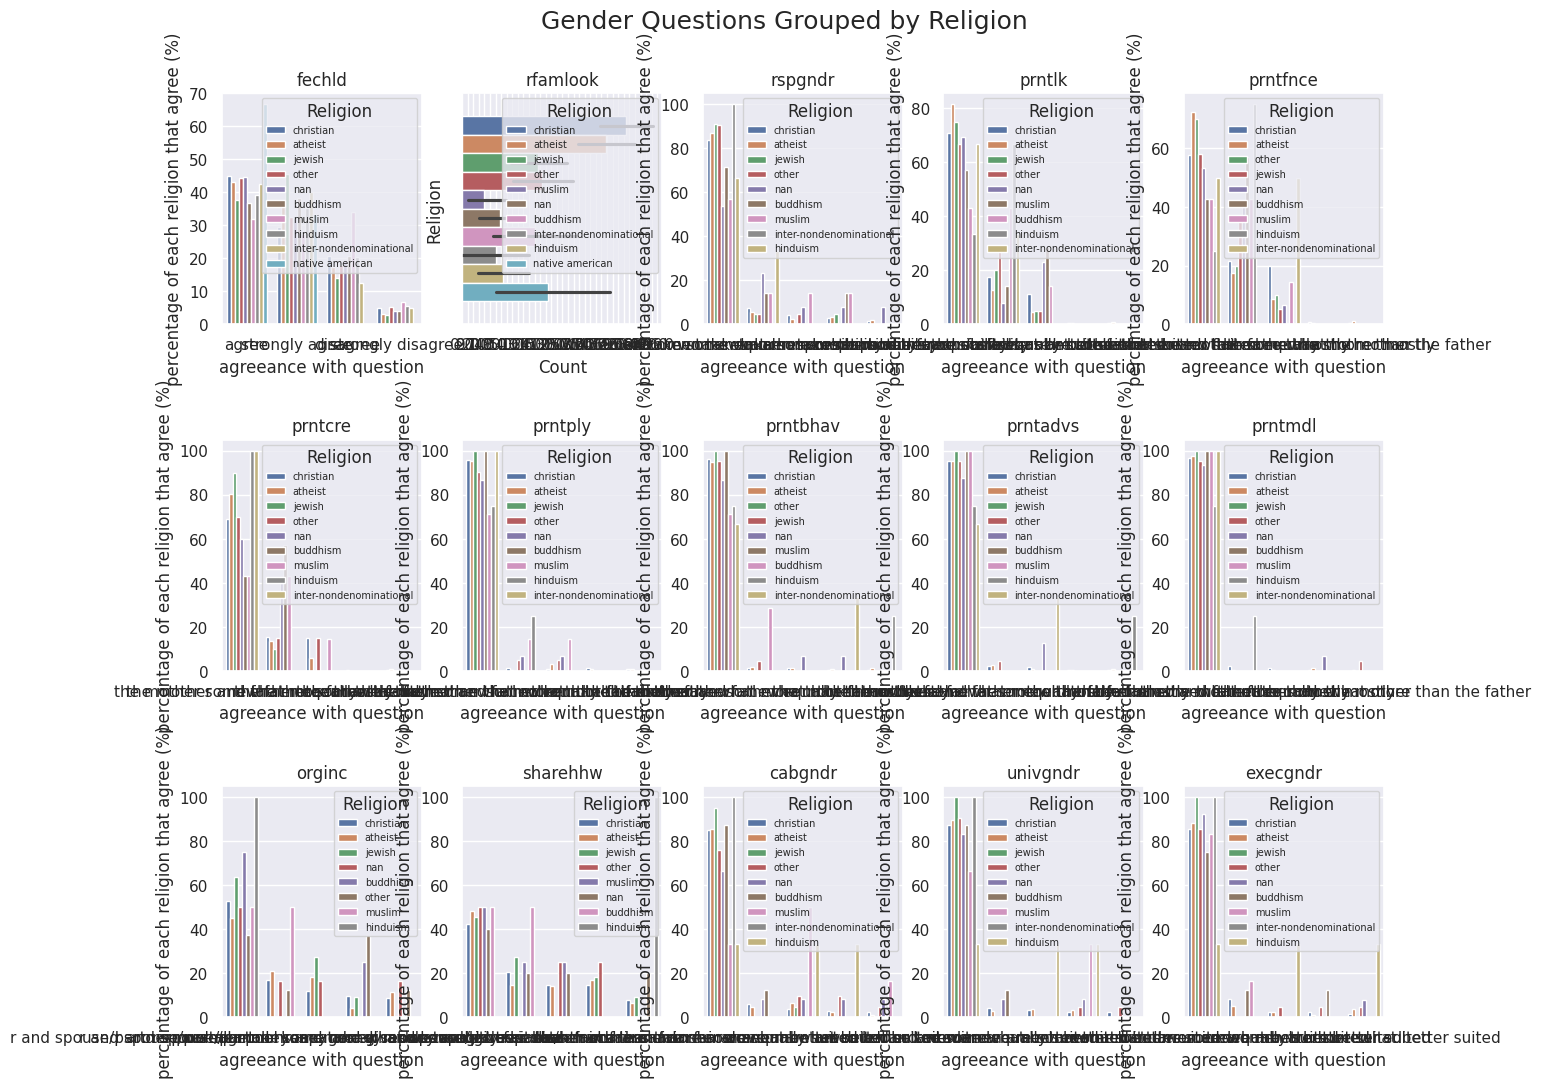

In [174]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(nrows=3, ncols=5)
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Gender Questions Grouped by Religion", fontsize=18, y=0.95)

#ticker = ['fechld', 'rfamlook']
tickers = ['fechld', 'rfamlook', 'rspgndr', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'orginc', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr']

for n, ticker in enumerate(tickers):
    ax = plt.subplot(3, 5, n + 1)
    curr_df = df_grouped_bar_graph.loc[:, ['relig', ticker]]
    col = curr_df[ticker].astype(str)
    curr_df[ticker] = col
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed

    if(ticker == 'rfamlook'):
      response = pd.DataFrame(data = curr_df.groupby(ticker).count())
    else:
      response = pd.DataFrame(data = curr_df[ticker].value_counts())
    response = response.reset_index()
    response.columns = ['response', 'count']

    curr_df = curr_df.loc[curr_df[ticker].isin(response['response'])].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": ticker, 0: "count"})
    curr_df = curr_df.loc[curr_df[ticker] != 'nan']

    religions = curr_df['relig'].unique()
    curr_df = normalize_each_religion(curr_df, religions)

    if(ticker == 'rfamlook'):
      sns.barplot(data = curr_df, x = ticker, hue = 'relig')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Religion', prop={'size': 7})
      plt.xlabel("Count")
      plt.ylabel("Religion")
      plt.title(ticker)
    else:
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'relig')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Religion', prop={'size': 7})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each religion that agree (%)")
      plt.title(ticker)

# Graphs Grouped by Age for Gender Role Questions

In [175]:
print(df['age'].unique())

[48. 25. 42. 24. 31. 46. 52. 50. 32. 57. 62. 66. 34. 30. 27. 59. 19. 23.
 35. 44. 78. 33. 21. 77. 70. 69. 26. 89. 37. 68. 83. 61. 72. 53. 79. 58.
 36. 51. 56. 43. 40. 82. 41. 73. 85. 64. 22. 39. 75. 80. 49. 76. 60. 74.
 28. 47. 63. 20. 55. 18. 81. 86. 67. 45. 84. nan 38. 65. 54. 29. 71. 87.
 88.]


Before coercion: 
 count    23539.000000
mean        49.094651
std         17.633970
min         18.000000
25%         34.000000
50%         48.000000
75%         63.000000
max         89.000000
Name: age, dtype: float64 



<Axes: >

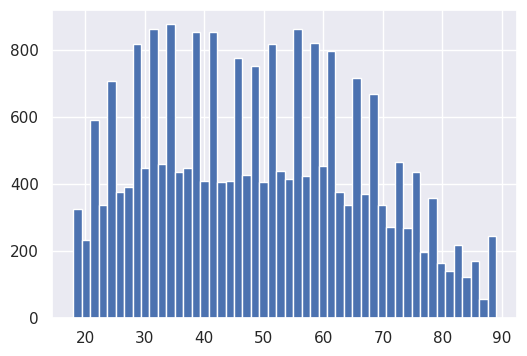

In [176]:
print('Before coercion: \n', df['age'].describe(),'\n') # The age variable is not read by Pandas as a number
df['age'].hist(bins=50) # Initial histogram; check out the x axis

In [177]:
# Create a missing dummy:
df['age'+'_nan'] = df['age'].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df['age'+'_nan']),'\n') # How many missing values are there?


Total Missings: 
 591 



In [178]:
age = df['age']
age_cleaned = age[~age.isnull()]
print(age_cleaned.unique())

[48. 25. 42. 24. 31. 46. 52. 50. 32. 57. 62. 66. 34. 30. 27. 59. 19. 23.
 35. 44. 78. 33. 21. 77. 70. 69. 26. 89. 37. 68. 83. 61. 72. 53. 79. 58.
 36. 51. 56. 43. 40. 82. 41. 73. 85. 64. 22. 39. 75. 80. 49. 76. 60. 74.
 28. 47. 63. 20. 55. 18. 81. 86. 67. 45. 84. 38. 65. 54. 29. 71. 87. 88.]


In [179]:
# Create a missing dummy CLEANED:
age_cleaned_nan = age_cleaned.isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(age_cleaned_nan),'\n') # How many missing values are there?

Total Missings: 
 0 



In [180]:
import numpy as np
age_18to29 = np.array([])
age_30to39 = np.array([])
age_40to49 = np.array([])
age_50to64 = np.array([])
age_65to89 = np.array([])

for age in df['age']:
  if 18 <= age <= 29:
    age_18to29 = np.append(age_18to29,age)
  elif 30 <= age <= 39:
    age_30to39= np.append(age_30to39,age)
  elif 40 <= age <= 49:
    age_40to49= np.append(age_40to49,age)
  elif 50 <= age <= 64:
    age_50to64= np.append(age_50to64,age)
  elif 65 <= age <= 89:
    age_65to89 = np.append(age_65to89,age)

print(age_18to29)
print(age_65to89)

[25. 24. 24. ... 29. 22. 29.]
[66. 78. 77. ... 78. 73. 84.]


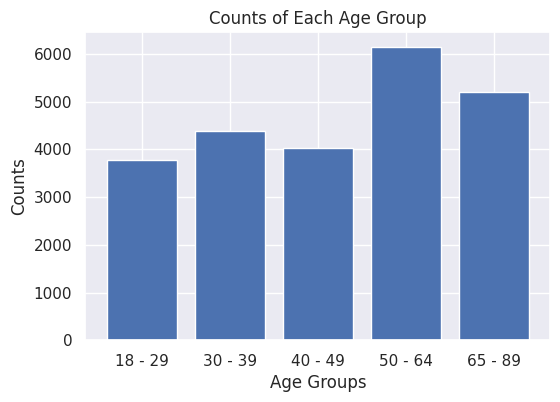

In [181]:
import matplotlib.pyplot as plt
import numpy as np
# grouped ages
age_ranges = ['18 - 29', '30 - 39', '40 - 49', '50 - 64', '65 - 89']
age_range_counts = [len(age_18to29), len(age_30to39), len(age_40to49), len(age_50to64), len(age_65to89)]

plt.bar(age_ranges, age_range_counts)
plt.xlabel('Age Groups')
plt.ylabel('Counts')
plt.title('Counts of Each Age Group')
plt.show()

In [182]:
def normalize_each_age(df, ages):
    # copy the dataframe
    df_norm = df.copy()
    ages = df_norm['age'].astype(int)
    df_norm['age'] = ages
    count = df_norm['count'].astype(float)
    df_norm['count'] = count

    age_bins = [18, 30, 40, 50, 65, 90]

    # Create a new column in the dataframe to store the age range labels
    df_norm['age_range'] = pd.cut(df_norm['age'], bins=age_bins, labels=age_ranges, right=False)

    # Group by age range and sum the counts
    age_range_counts = df_norm.groupby('age_range', group_keys = False)['count'].sum().reset_index()

    # Normalize counts within each age range
    age_range_counts['count'] = age_range_counts.groupby('age_range', group_keys = False)['count'].apply(lambda x: (x / x.sum()) * 100)

    df_norm.drop(columns=['age'], inplace=True)
    return df_norm


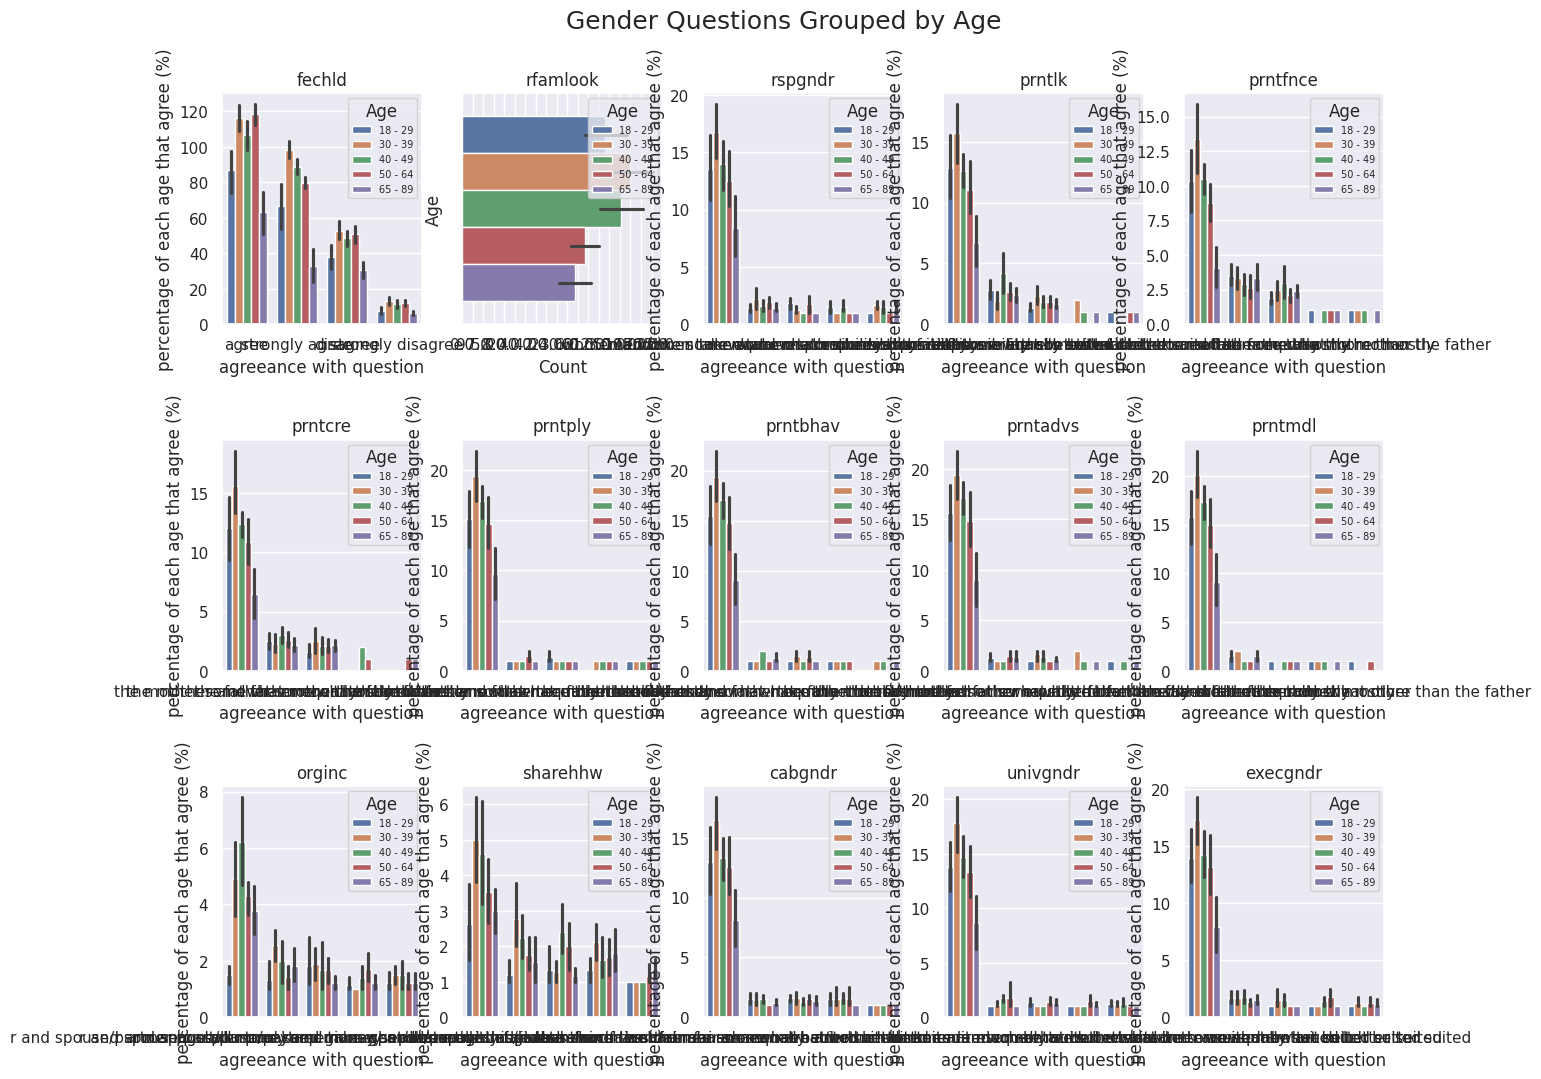

In [183]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(nrows=3, ncols=5)
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Gender Questions Grouped by Age", fontsize=18, y=0.95)

#ticker = ['fechld', 'rfamlook']
tickers = ['fechld', 'rfamlook', 'rspgndr', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'orginc', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr']

for n, ticker in enumerate(tickers):
    ax = plt.subplot(3, 5, n + 1)
    curr_df = df_grouped_bar_graph.loc[:, ['age', ticker]].copy()
    col = curr_df[ticker].astype(str)
    curr_df[ticker] = col
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed

    if(ticker == 'rfamlook'):
      response = pd.DataFrame(data = curr_df.groupby(ticker).count())
    else:
      response = pd.DataFrame(data = curr_df[ticker].value_counts())
    response = response.reset_index()
    response.columns = ['response', 'count']

    curr_df = curr_df.loc[curr_df[ticker].isin(response['response'])].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": ticker, 0: "count"})
    curr_df = curr_df.loc[curr_df[ticker] != 'nan']

    ages = curr_df['age'].unique()
    curr_df = normalize_each_age(curr_df, ages)

    if(ticker == 'rfamlook'):
      sns.barplot(data = curr_df, x = ticker, hue = 'age_range')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Age', prop={'size': 7})
      plt.xlabel("Count")
      plt.ylabel("Age")
      plt.title(ticker)
    else:
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'age_range')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Age', prop={'size': 7})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each age that agree (%)")
      plt.title(ticker)

# Bar Graphs Grouped by Gender for Gender Role Questions

In [184]:
print(df_grouped_bar_graph['sex'].unique())

['male', 'female', NaN]
Categories (15, object): ['male', 'female', 'don't know', 'iap', ..., 'uncodeable',
                          'not available in this release', 'not available in this year', 'see codebook']


Before coercion: 
 count      24018
unique         2
top       female
freq       13234
Name: sex, dtype: object 



<Axes: >

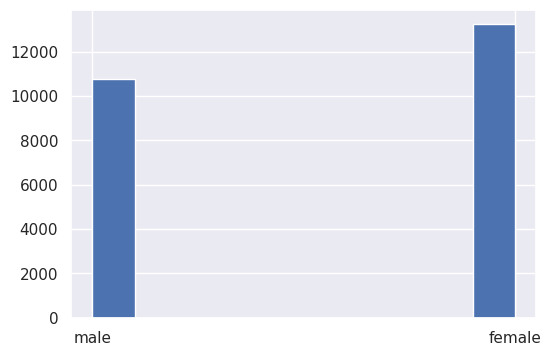

In [185]:
print('Before coercion: \n', df_grouped_bar_graph['sex'].describe(),'\n') # already viewed as category, but there are missings
df_grouped_bar_graph['sex'].hist()

In [186]:
# Create a missing dummy:
df_grouped_bar_graph['sex'+'_nan'] = df_grouped_bar_graph['sex'].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df_grouped_bar_graph['sex'+'_nan']),'\n') # How many missing values are there?

Total Missings: 
 112 



In [187]:
df_grouped_bar_graph['sex'] = df_grouped_bar_graph['sex'].replace(["don't know", 'iap', 'uncodeable', "I don't have a job", 'dk, na, iap', 'no answer', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'refused', 'skipped on web', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'],np.nan)
df_grouped_bar_graph['sex'] = df_grouped_bar_graph['sex'].dropna()

In [188]:
def normalize_each_sex(df, sexes):
    # copy the dataframe
    df_norm = df.copy()
    count = df_norm['count'].astype(float)
    df_norm['count'] = count
    for sex in sexes:
        sex_sum = df_norm['count'].loc[df_norm['sex'] == sex].sum()
        df_norm['count'].loc[df_norm['sex'] == sex] = ((df_norm['count'].loc[df_norm['sex'] == sex])/sex_sum) * 100
    return df_norm

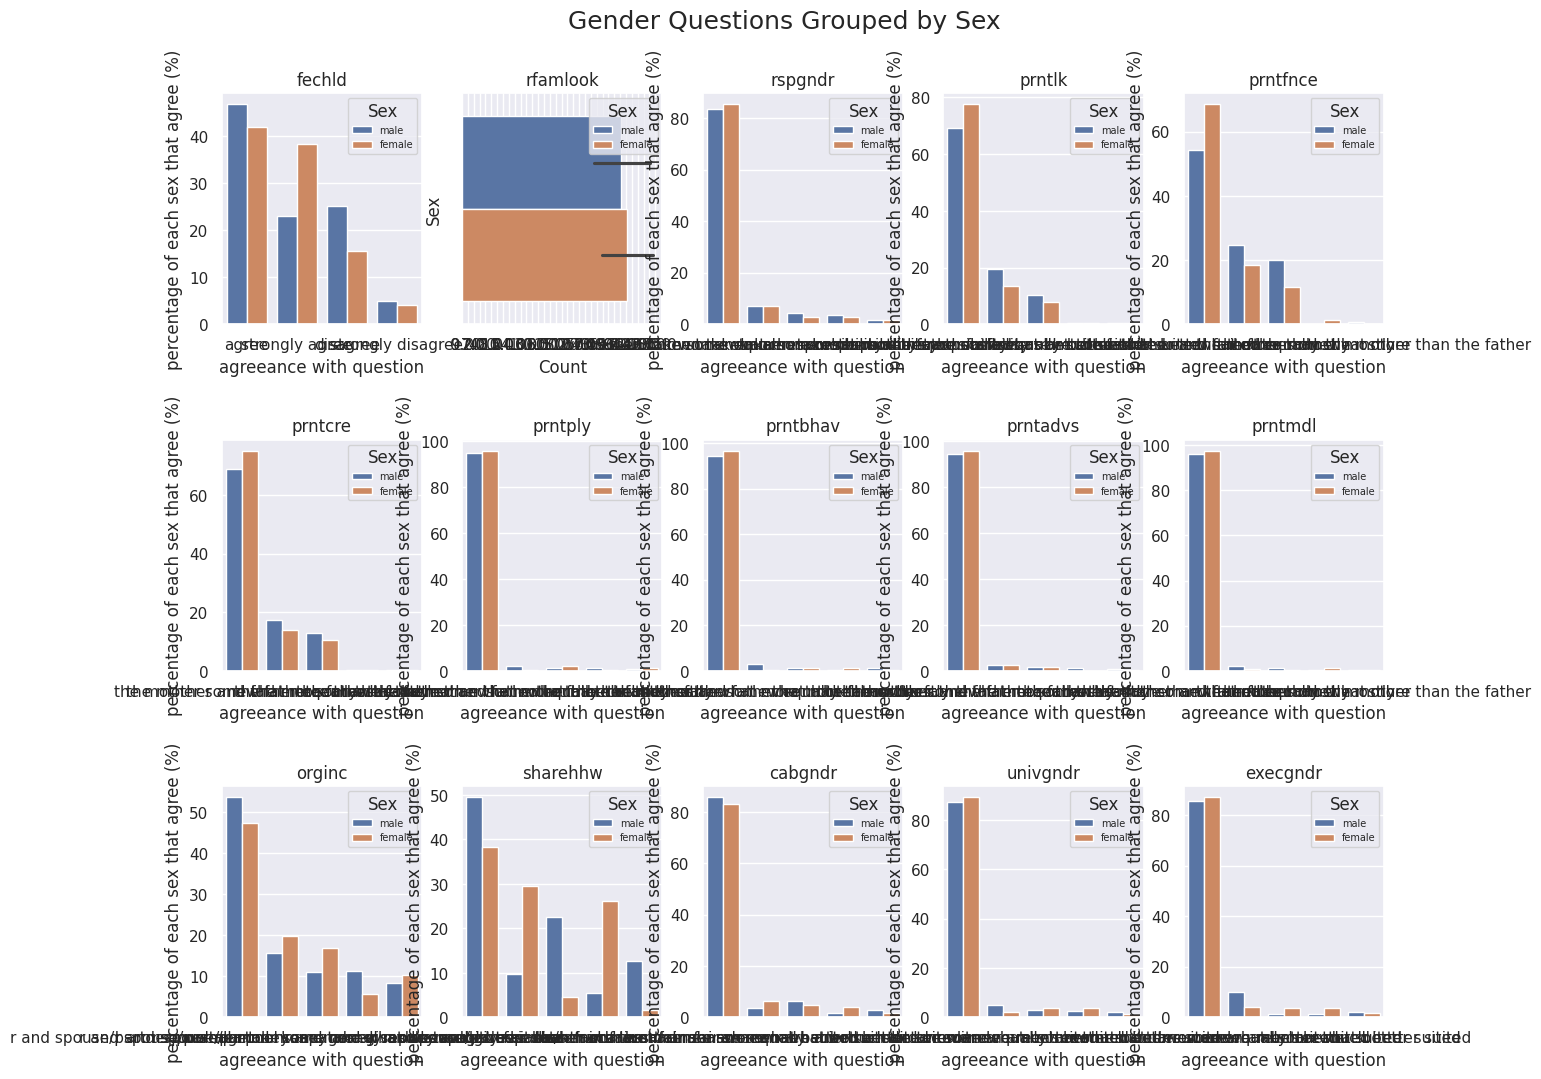

In [189]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(nrows=3, ncols=5)
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Gender Questions Grouped by Sex", fontsize=18, y=0.95)

#ticker = ['fechld', 'rfamlook']
tickers = ['fechld', 'rfamlook', 'rspgndr', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'orginc', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr']

for n, ticker in enumerate(tickers):
    ax = plt.subplot(3, 5, n + 1)
    curr_df = df_grouped_bar_graph.loc[:, ['sex', ticker]]
    col = curr_df[ticker].astype(str)
    curr_df[ticker] = col
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed

    if(ticker == 'rfamlook'):
      response = pd.DataFrame(data = curr_df.groupby(ticker).count())
    else:
      response = pd.DataFrame(data = curr_df[ticker].value_counts())
    response = response.reset_index()
    response.columns = ['response', 'count']

    curr_df = curr_df.loc[curr_df[ticker].isin(response['response'])].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": ticker, 0: "count"})
    curr_df = curr_df.loc[curr_df[ticker] != 'nan']

    sexes = curr_df['sex'].unique()
    curr_df = normalize_each_sex(curr_df, sexes)

    if(ticker == 'rfamlook'):
      sns.barplot(data = curr_df, x = ticker, hue = 'sex')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Sex', prop={'size': 7})
      plt.xlabel("Count")
      plt.ylabel("Sex")
      plt.title(ticker)
    else:
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'sex')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Sex', prop={'size': 7})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each sex that agree (%)")
      plt.title(ticker)

# Old Code

In [190]:
# just plotting this would include responses that are never given, which crowds the graph
df['fechld'].value_counts()

agree                            6805
strongly agree                   4850
disagree                         3061
strongly disagree                 680
not imputable_(2147483638)          0
not available in this year          0
not available in this release       0
uncodeable                          0
skipped on web                      0
refused                             0
no answer                           0
not imputable_(2147483637)          0
dk, na, iap                         0
I don't have a job                  0
iap                                 0
don't know                          0
see codebook                        0
Name: fechld, dtype: int64

Text(0.5, 1.0, 'A working mother can establish just as warm and secure a \n relationship with her children as a mother who does not work')

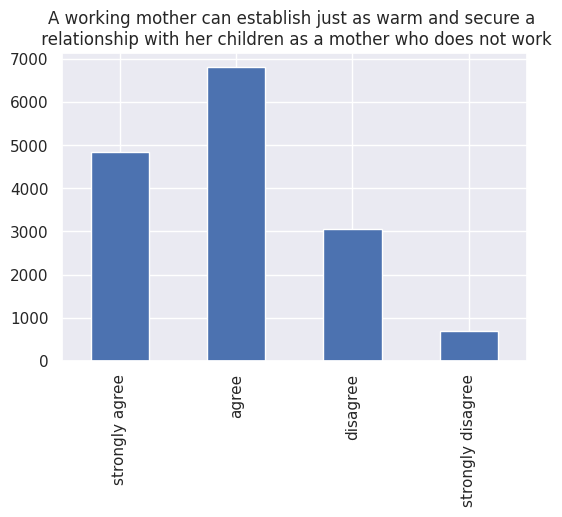

In [191]:
#FECHLD
fechld = df['fechld'].value_counts()[['strongly agree','agree', 'disagree','strongly disagree']] # value counts returns type series
fechld[fechld != 0].plot(kind='bar') # removes counts equal to 0
plt.title("A working mother can establish just as warm and secure a \n relationship with her children as a mother who does not work")

Text(0.5, 1.0, 'On average, how many hours a week do you spend looking after family \n members (e.g. children, elderly, ill or disabled family members)?')

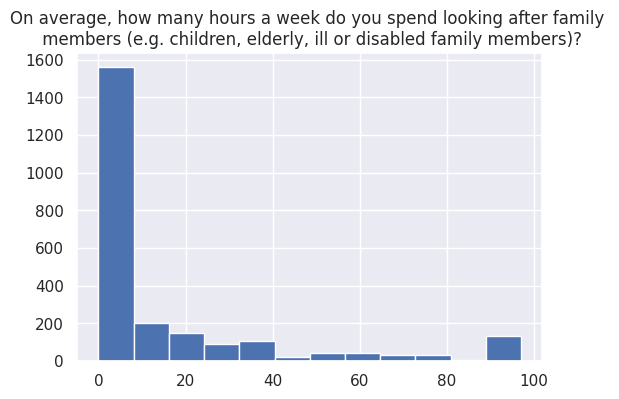

In [192]:
#RFAMLOOK
plt.hist(df['rfamlook'], bins =12)
plt.title("On average, how many hours a week do you spend looking after family \n members (e.g. children, elderly, ill or disabled family members)?")

Text(0.5, 1.0, 'A pre-school child is likely to suffer if his or her mother works.')

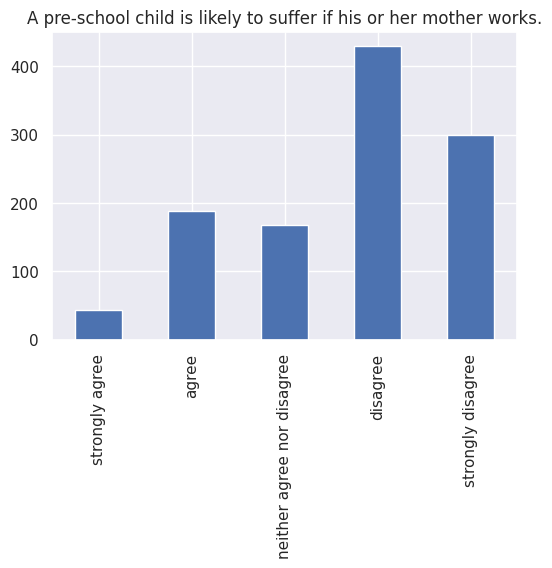

In [193]:
#FEPRESCH2
fepresch2 = df['fepresch2'].value_counts()[['strongly agree','agree', 'neither agree nor disagree','disagree','strongly disagree']].plot(kind='bar')
plt.title("A pre-school child is likely to suffer if his or her mother works.")

Text(0.5, 1.0, 'How much responsibility should women and men have for the home and family?')

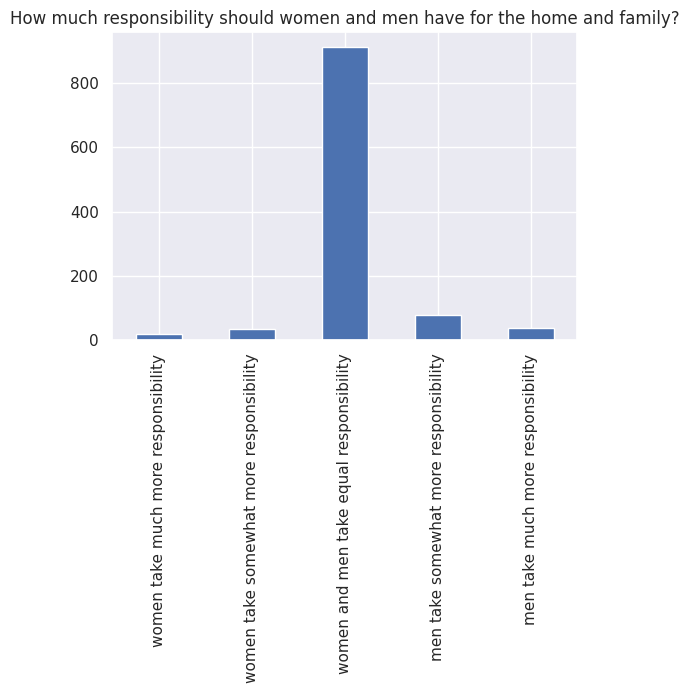

In [194]:
#RSPGNDR
rspgndr = df['rspgndr'].value_counts()[['women take much more responsibility', 'women take somewhat more responsibility', 'women and men take equal responsibility', 'men take somewhat more responsibility', 'men take much more responsibility']] # value counts returns type series
rspgndr[rspgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("How much responsibility should women and men have for the home and family?")

Text(0.5, 1.0, 'How well are mothers and fathers are suited to look after their children?')

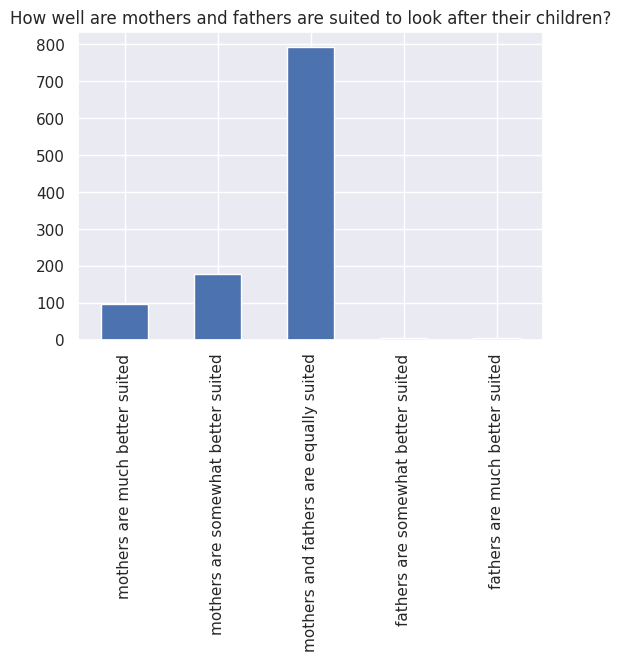

In [195]:
#PRNTLK
prntlk = df['prntlk'].value_counts()[['mothers are much better suited','mothers are somewhat better suited','mothers and fathers are equally suited','fathers are somewhat better suited','fathers are much better suited']] # value counts returns type series
prntlk[prntlk != 0].plot(kind='bar') # removes counts equal to 0
plt.title("How well are mothers and fathers are suited to look after their children?")

Text(0.5, 1.0, '5yro child - Who should provide for the family financially?')

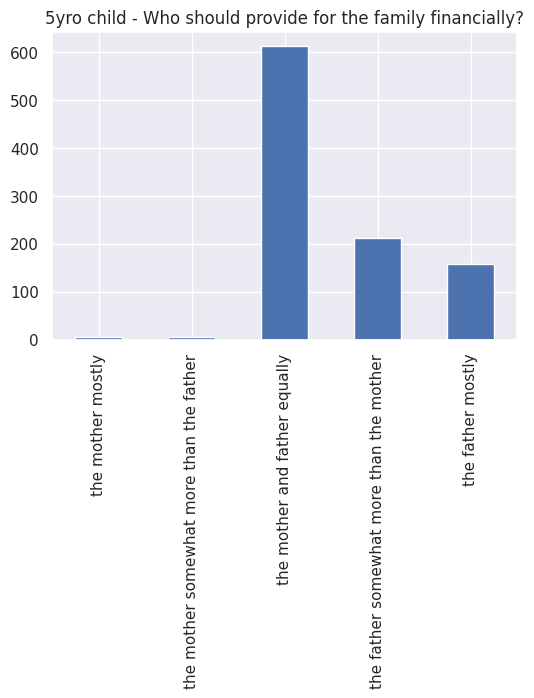

In [196]:
#PRNTFNCE
prntfnce = df['prntfnce'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntfnce[prntfnce != 0].plot(kind='bar') # removes counts equal to 0
plt.title("5yro child - Who should provide for the family financially?")

Text(0.5, 1.0, 'Who should take care of the child on a daily basis?')

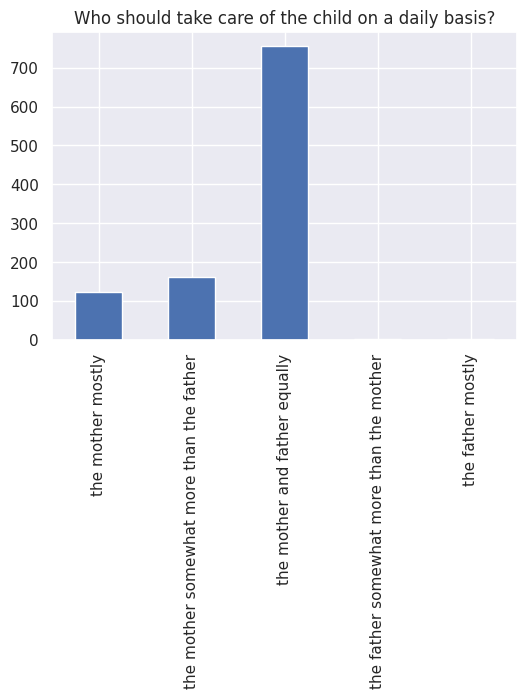

In [197]:
#PRNTCRE
prntcre = df['prntcre'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntcre[prntcre != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should take care of the child on a daily basis?")

Text(0.5, 1.0, 'Who should play with the child, and \ntake part in his/her leisure activities?')

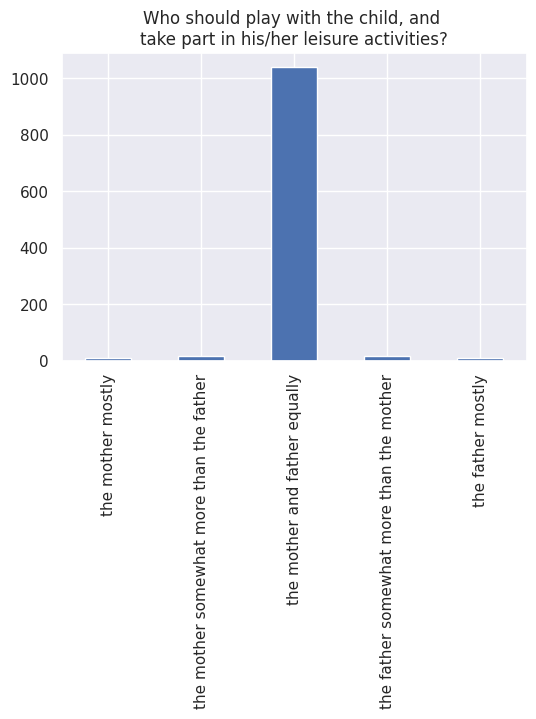

In [198]:
#PRNTPLY
prntply = df['prntply'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntply[prntply != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should play with the child, and \ntake part in his/her leisure activities?")

Text(0.5, 1.0, 'Who should teach the child how to behave?')

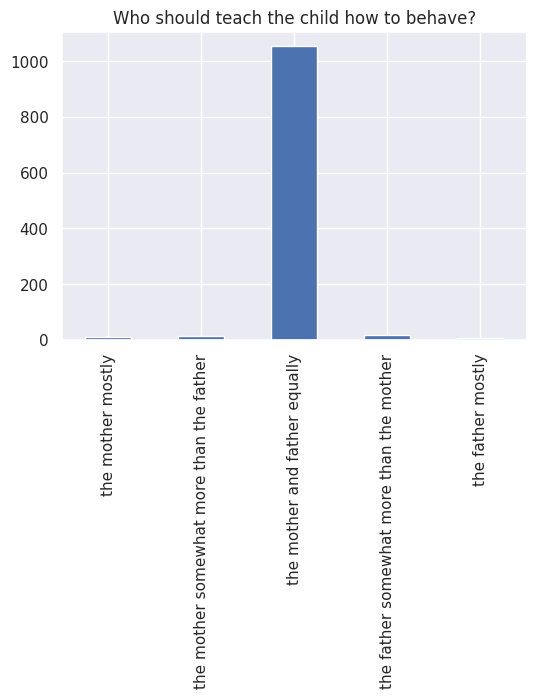

In [199]:
#PRNTBHAV
prntbhav = df['prntbhav'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntbhav[prntbhav != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should teach the child how to behave?")

Text(0.5, 1.0, 'Who should take time to listen to and \nadvise the child if he/she has problems?')

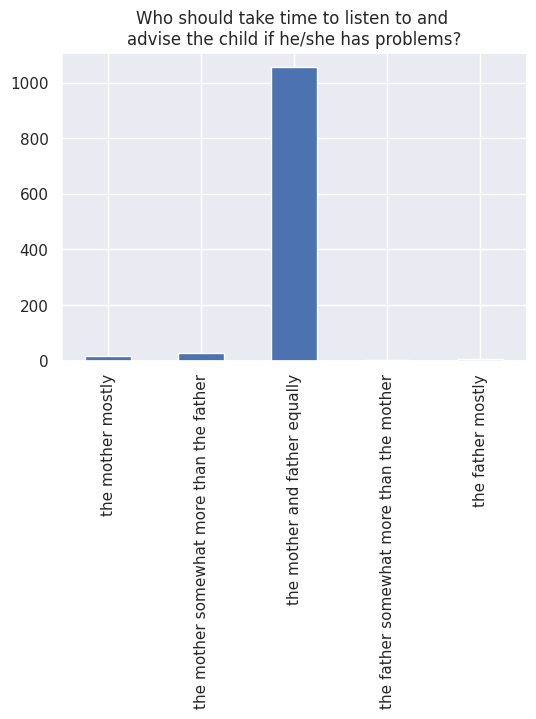

In [200]:
#PRNTADVS
prntadvs = df['prntadvs'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntadvs[prntadvs != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should take time to listen to and \nadvise the child if he/she has problems?")

Text(0.5, 1.0, 'Who should try to be a role model for the child?')

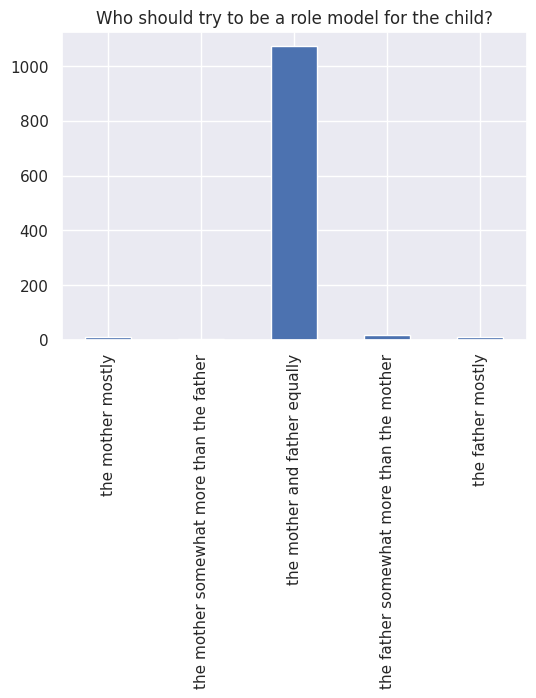

In [201]:
#PRNTMDL
prntmdl = df['prntmdl'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntmdl[prntmdl != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should try to be a role model for the child?")

Text(0.5, 1.0, 'How do you and your spouse/partner organize the \nincome that one or both of you receive?')

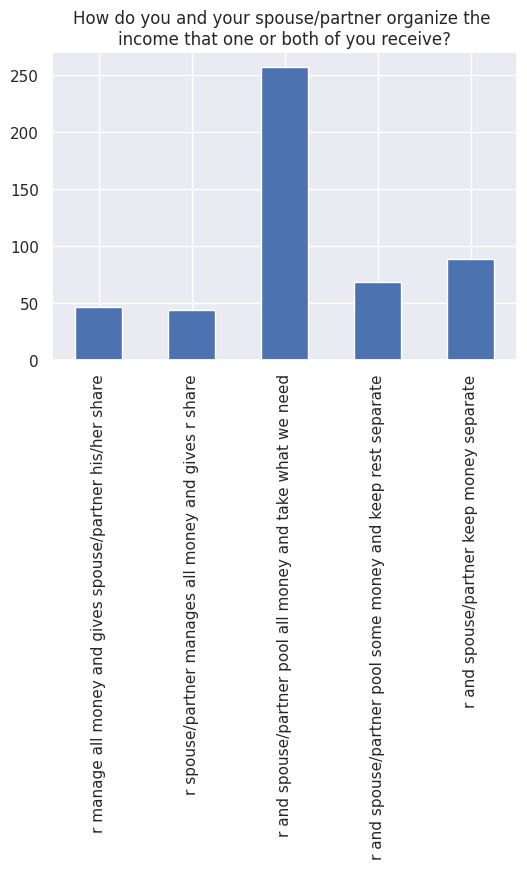

In [202]:
#ORGINC
orginc = df['orginc'].value_counts()[['r manage all money and gives spouse/partner his/her share',
                                      'r spouse/partner manages all money and gives r share',
                                      'r and spouse/partner pool all money and take what we need',
                                      'r and spouse/partner pool some money and keep rest separate',
                                      'r and spouse/partner keep money separate']] # value counts returns type series
orginc[orginc != 0].plot(kind='bar') # removes counts equal to 0
plt.title("How do you and your spouse/partner organize the \nincome that one or both of you receive?")

Text(0.5, 1.0, 'Sharing of household work between you and your spouse/partner')

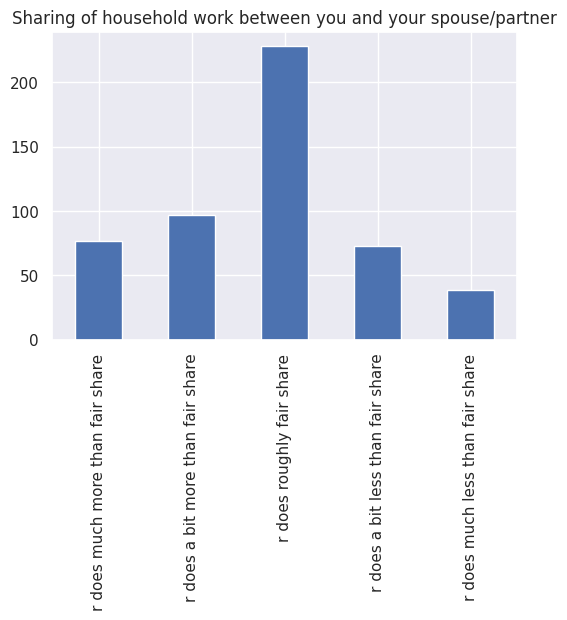

In [203]:
#SHAREHHW
sharehhw = df['sharehhw'].value_counts()[['r does much more than fair share',
                                      'r does a bit more than fair share',
                                      'r does roughly fair share',
                                      'r does a bit less than fair share',
                                      'r does much less than fair share']] # value counts returns type series
sharehhw[sharehhw != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Sharing of household work between you and your spouse/partner")

Text(0.5, 1.0, 'Who is better suited for the role of a member of the cabinet?')

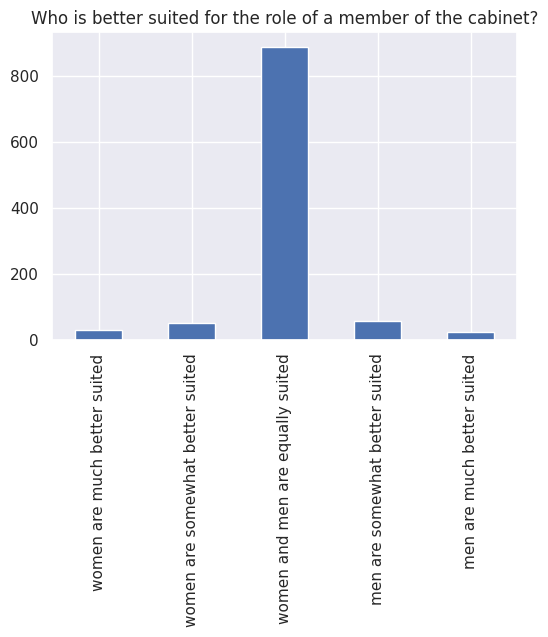

In [204]:
#CABGNDR
cabgndr = df['cabgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
cabgndr[cabgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who is better suited for the role of a member of the cabinet?")

Text(0.5, 1.0, 'Who is better suited for the role of a head of a university?')

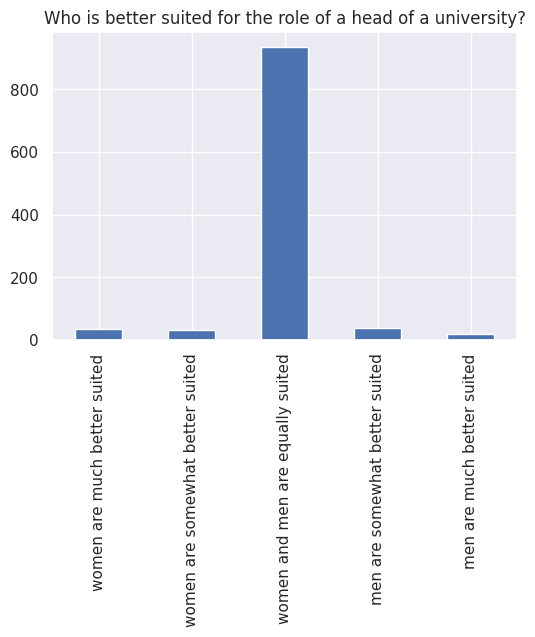

In [205]:
#UNIVGNDR
univgndr = df['univgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
univgndr[univgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who is better suited for the role of a head of a university?")

Text(0.5, 1.0, 'Who is better suited for the role of \na senior executive of a large company?')

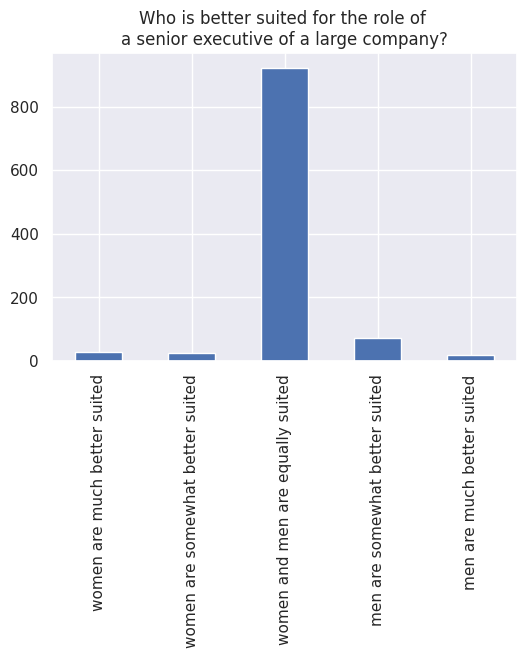

In [206]:
#EXECGNDR
execgndr = df['execgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
execgndr[execgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who is better suited for the role of \na senior executive of a large company?")